In [1]:
import pandas as pd
from statsmodels.regression import linear_model
from patsy import dmatrices
import statsmodels.graphics.tsaplots as tsa
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA as ARIMA
import numpy as np

In [4]:
df = pd.read_csv('air_quality_uci_mod.csv', header=0)

In [5]:
df.head(10)

,DateTime,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOx_GT,PT08_S3_NOx,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
0,03-10-04 18:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,03-10-04 19:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,03-10-04 20:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,03-10-04 21:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,03-10-04 22:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
5,03-10-04 23:00,1.2,1197,38,4.7,750,89,1337,96,1393,949,11.2,59.2,0.7848
6,03-11-04 00:00,1.2,1185,31,3.6,690,62,1462,77,1333,733,11.3,56.8,0.7603
7,03-11-04 01:00,1.0,1136,31,3.3,672,62,1453,76,1333,730,10.7,60.0,0.7702
8,03-11-04 02:00,0.9,1094,24,2.3,609,45,1579,60,1276,620,10.7,59.7,0.7648
9,03-11-04 03:00,0.6,1010,19,1.7,561,-200,1705,-200,1235,501,10.3,60.2,0.7517


In [6]:
df['DateTimeIndex']= pd.to_datetime(df['DateTime'])
df = df.set_index(keys=['DateTimeIndex'])

In [7]:
df = df.asfreq('H')
df = df.fillna(df.mean())

C:\Users\55839\AppData\Local\Temp/ipykernel_15716/3755235341.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


In [8]:
df.isin([np.nan, np.inf, -np.inf]).sum()

DateTime        2013
CO_GT              0
PT08_S1_CO         0
NMHC_GT            0
C6H6_GT            0
PT08_S2_NMHC       0
NOx_GT             0
PT08_S3_NOx        0
NO2_GT             0
PT08_S4_NO2        0
PT08_S5_O3         0
T                  0
RH                 0
AH                 0
dtype: int64

In [9]:
dataset_len = len(df)
split_index = round(dataset_len*0.9)
train_set_end_date = df.index[split_index]
df_train = df.loc[df.index <= train_set_end_date].copy()
df_test = df.loc[df.index > train_set_end_date].copy()

In [11]:
expr = 'PT08_S4_NO2 ~ T + AH'
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

In [12]:
olsr_results = linear_model.OLS(y_train, X_train).fit()

In [13]:
olsr_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PT08_S4_NO2   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     2991.
Date:                Thu, 09 Dec 2021   Prob (F-statistic):               0.00
Time:                        06:59:50   Log-Likelihood:                -57736.
No. Observations:                8422   AIC:                         1.155e+05
Df Residuals:                    8419   BIC:                         1.155e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    902.9774      7.820    115.471      0.000     887.648     918.306
T              9.7918      0.423     23.138      0.000       8.962      10.621
AH           384.4853      9.407     40.873      0.000     366.046     402.925
==============================================================================
Omnibus:                     1713.095   Durbin-Watson:                   0.343
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4031.921
Skew:                           1.142   Prob(JB):                         0.00
Kurtosis:                       5.504   Cond. No.                         87.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

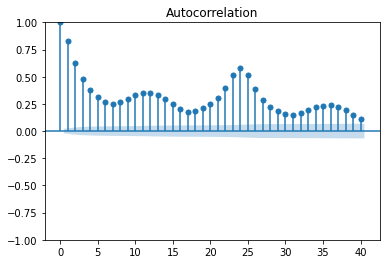

In [14]:
tsa.plot_acf(olsr_results.resid, alpha=0.05)
plt.show()

In [15]:
olsr_resid_diff_1 = olsr_results.resid.diff()
olsr_resid_diff_1 = olsr_resid_diff_1.dropna()

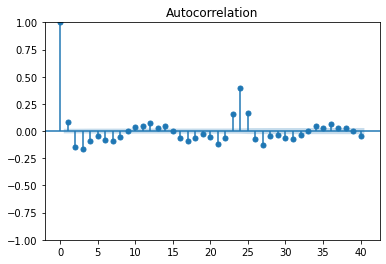

In [16]:
tsa.plot_acf(olsr_resid_diff_1, alpha=0.05)
plt.show()

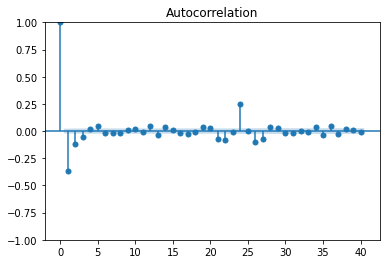

In [17]:
olsr_resid_diff_2 = olsr_resid_diff_1.diff()
olsr_resid_diff_2 = olsr_resid_diff_2.dropna()
tsa.plot_acf(olsr_resid_diff_2, alpha=0.05)
plt.show()

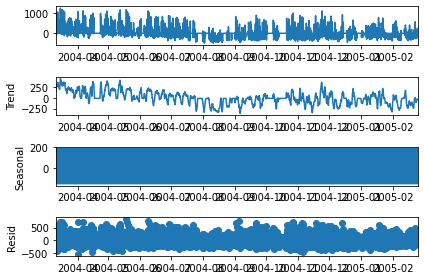

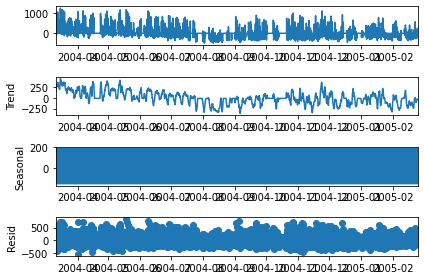

In [18]:
components = seasonal_decompose(olsr_results.resid)
components.plot()

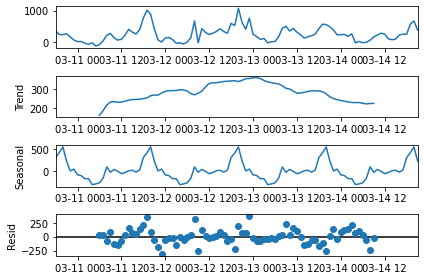

In [25]:
components = seasonal_decompose(olsr_results.resid[0:100]).plot()


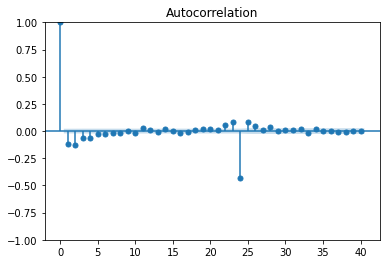

In [28]:
olsr_resid_diff_1_24 = olsr_resid_diff_1.diff(periods=24)
olsr_resid_diff_1_24 = olsr_resid_diff_1_24.dropna()
tsa.plot_acf(olsr_resid_diff_1_24, alpha=0.05)
plt.show()

In [29]:
X_train_minus_intercept = X_train.drop('Intercept', axis=1)
X_train_minus_intercept = X_train_minus_intercept.asfreq('H')
 
y_train = y_train.asfreq('H')

In [30]:
sarimax_model = ARIMA(endog=y_train, exog=X_train_minus_intercept,order=(1,1,0), seasonal_order=(0,1,1,24))
sarimax_results = sarimax_model.fit()
sarimax_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        PT08_S4_NO2   No. Observations:                 8422
Model:             ARIMA(1, 1, 0)x(0, 1, [1], 24)   Log Likelihood              -51756.592
Date:                            Thu, 09 Dec 2021   AIC                         103523.184
Time:                                    07:14:54   BIC                         103558.362
Sample:                                03-10-2004   HQIC                        103535.196
                                     - 02-24-2005                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
T              6.0624      0.542     11.191      0.000       5.001       7.124
AH           509.7829      8.724     58.433      0.000     492.684     526.882
ar.L1         -0.0619      0.007     -8.688      0.000      -0.076      -0.048
ma.S.L24      -0.9162      0.003   -273.853      0.000      -0.923      -0.910
sigma2      1.325e+04    116.233    113.957      0.000     1.3e+04    1.35e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.82   Jarque-Bera (JB):              7274.88
Prob(Q):                              0.37   Prob(JB):                         0.00
Heteroskedasticity (H):               0.69   Skew:                             0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""